In [1]:
library(tidyverse)
library(data.table)
library(ggplot2)
library(ggalluvial)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
“package ‘data.table’ was built under R version 4.2.2”

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:

In [2]:
all_var_df_f <- fread('/home/mingjian/workbase/04_chemical.methods/07.code_submit/data/Fig3_data/Fig3DE_data.csv')

In [3]:
order_3 <- c('5.5hpf-Dropseq-IAA','5.5hpf-Dropseq-mCPBApH5.2','5.5hpf-Dropseq-mCPBApH7.4')

In [4]:
head(all_var_df_f,2)

gene_name,mt,n_cells,nCells,nCounts,pass_basic_filter,log_m,score,log_cv,frac,use_for_pca,ntr,sample,classification
<chr>,<lgl>,<int>,<int>,<int>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<chr>,<chr>
AL590150.2,FALSE,72,72,78,TRUE,-4.886274,-0.1006419,2.588405,5.435317e-06,FALSE,0.7948718,5.5hpf-Dropseq-IAA,Z(ntr>0.65)
AL645691.1,FALSE,63,63,72,TRUE,-4.760516,0.2450528,2.873923,5.930370e-06,TRUE,0.9027778,5.5hpf-Dropseq-IAA,Z(ntr>0.65)


# Fig3D

In [5]:
prop_df <- prop.table(table(all_var_df_f$sample,all_var_df_f$classification),margin = 1) %>% as.data.frame()

In [6]:
prop_df$Var2 <- factor(prop_df$Var2,levels = c('Z(ntr>0.65)','MZ','M(ntr<0.05)'))
head(prop_df,2)

,Var1,Var2,Freq
,<fct>,<fct>,<dbl>
1,5.5hpf-Dropseq-IAA,M(ntr<0.05),0.07565236
2,5.5hpf-Dropseq-mCPBApH5.2,M(ntr<0.05),0.04246805


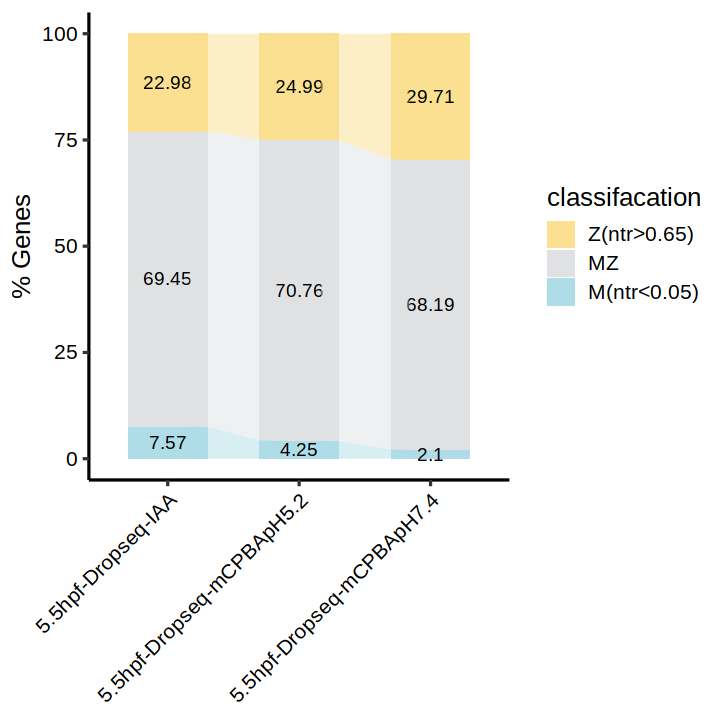

In [7]:
options(repr.plot.width = 6 ,repr.plot.height = 6)
ggplot(data =prop_df ,aes(x = Var1,y = round(Freq*100,2),fill = Var2,alluvium  = Var2)) + 
       geom_bar(stat = "identity",width = .6,position="stack") + 
       geom_text(aes(label = round(Freq*100,2)), position = position_stack(vjust = 0.5), color = "black",size=4) +  
       geom_flow(alpha = .5) + 
       scale_fill_manual(values=c('#FAE090','#DFE1E3','#AFDDE7')) +
       theme_classic(base_size = 15)+
       labs(y = '% Genes', fill = 'classifacation')+labs(x = NULL)+
       theme(axis.text.x= element_text(colour = 'black',angle = 45,hjust = 1),
            axis.text.y= element_text(colour = 'black'))


# Fig3E

In [8]:
Z_genes <- subset(all_var_df_f,classification=='Z(ntr>0.65)')

In [9]:
venn.gene.list <- split(Z_genes$gene_name,Z_genes$sample)

In [10]:
library(ggsci)
library(RColorBrewer)
library(VennDiagram)
library(venn)
library(ggvenn)
library(ggVennDiagram)

Loading required package: grid

Loading required package: futile.logger


Attaching package: ‘ggVennDiagram’


The following object is masked from ‘package:tidyr’:

    unite




In [11]:
venn <- Venn(venn.gene.list)
venn.data <- process_data(venn)

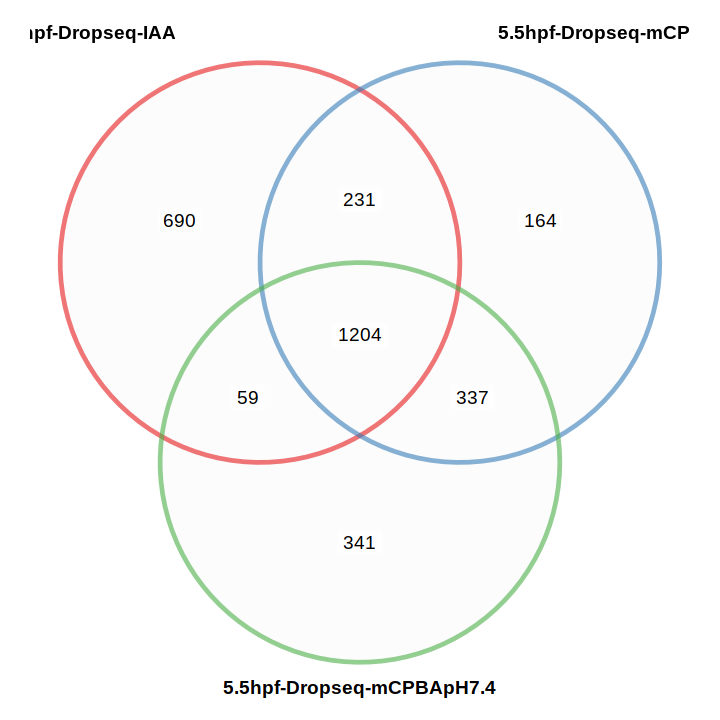

In [12]:
options(repr.plot.height = 6, repr.plot.width = 6)
ggplot() +
  # change mapping of color filling
  geom_polygon(aes(X, Y, fill = id, group = id), 
          data = venn_regionedge(venn.data),fill='gray99',
          show.legend = FALSE) +
  # adjust edge size and color
  geom_path(aes(X, Y, color = id, group = id), 
          data = venn_setedge(venn.data), 
          linewidth = 1,
          show.legend = FALSE) +
  # show set label in bold
  geom_text(aes(X, Y, label = name), 
            fontface = "bold",
            data = venn_setlabel(venn.data)) +
  # add a alternative region name
  geom_label(aes(X, Y, label = count), 
             data = venn_regionlabel(venn.data),
             alpha = 0.5,label.size = NA) +
  coord_equal() +
  scale_color_manual(values = alpha(colorRampPalette(brewer.pal(9,'Set1'))(9)[1:3],0.6))+
  theme_void()


# FigS4 C

In [13]:
bins_cut <- function(df,braek) {
  df$bin <- cut(df$ntr,
                breaks = quantile(df$ntr, probs = braek),
                include.lowest = TRUE,
                labels = FALSE)

  df <- df %>%
    group_by(bin) %>%
    mutate(min_ntr = min(ntr),
           max_ntr = max(ntr)) %>%
    ungroup() %>%
    mutate(range = paste0(format(round(min_ntr, 2)*100, nsmall = 0), "-", format(round(max_ntr, 2)*100, nsmall = 0),'%')) %>%
    select(-min_ntr, -max_ntr)

  return(df)
}

In [14]:
table(all_var_df_f$sample)
head(all_var_df_f,1)


       5.5hpf-Dropseq-IAA 5.5hpf-Dropseq-mCPBApH5.2 5.5hpf-Dropseq-mCPBApH7.4 
                     9504                      7747                      6533 

gene_name,mt,n_cells,nCells,nCounts,pass_basic_filter,log_m,score,log_cv,frac,use_for_pca,ntr,sample,classification
<chr>,<lgl>,<int>,<int>,<int>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<chr>,<chr>
AL590150.2,FALSE,72,72,78,TRUE,-4.886274,-0.1006419,2.588405,5.435317e-06,FALSE,0.7948718,5.5hpf-Dropseq-IAA,Z(ntr>0.65)


In [15]:
df_iaa <- subset(all_var_df_f,sample =='5.5hpf-Dropseq-IAA')
df_m5 <- subset(all_var_df_f,sample =='5.5hpf-Dropseq-mCPBApH5.2')
df_m7 <- subset(all_var_df_f,sample =='5.5hpf-Dropseq-mCPBApH7.4')

In [16]:
list_df <- list(df_iaa = df_iaa, df_m5 = df_m5, df_m7 = df_m7)

range_list_df <- lapply(list_df, function(df) {
  df$bin <- cut(df$ntr,
                breaks = quantile(df$ntr, probs = seq(0, 1, by = 0.1)),
                include.lowest = TRUE,
                labels = FALSE)

  df <- df %>%
    group_by(bin) %>%
    mutate(min_ntr = min(ntr),
           max_ntr = max(ntr)) %>%
    ungroup() %>%
    mutate(range = paste0(format(round(min_ntr, 2)*100, nsmall = 0), "-", format(round(max_ntr, 2)*100, nsmall = 0),'%')) %>%
    select(-min_ntr, -max_ntr)

  return(df)
})


In [17]:
range_3df <- bind_rows(range_list_df)

In [18]:
table(range_3df$sample)


       5.5hpf-Dropseq-IAA 5.5hpf-Dropseq-mCPBApH5.2 5.5hpf-Dropseq-mCPBApH7.4 
                     9504                      7747                      6533 

In [19]:
options(repr.plot.height =5, repr.plot.width = 5)
iaa_bin_plot <- ggplot(data = range_list_df$df_iaa,mapping = aes(x=range,y=ntr*100))+
  geom_violin(fill= '#E6E6E6',trim = TRUE,draw_quantiles = c(0.25, 0.5, 0.75),scale = "width")+
  geom_boxplot(width = 0.2,fill='grey',outlier.shape = NA) +
  stat_summary(fun.y="median",geom="point",shape=20, size=2,fill="grey")+
  ylab("% zygotic RNA(per gene)") +
  xlab(" ") +
theme_bw(base_size = 20)+
  theme(axis.text.x = element_text(colour = 'black',angle=90,vjust = 0.5),panel.grid = element_blank(),
                                  legend.position = 'none')

Warning message:
“The `fun.y` argument of `stat_summary()` is deprecated as of ggplot2 3.3.0.
ℹ Please use the `fun` argument instead.”


In [20]:
m5_bin_plot <- ggplot(data = range_list_df$df_m5,mapping = aes(x=range,y=ntr*100))+
  geom_violin(fill= '#E6E6E6',trim = TRUE,draw_quantiles = c(0.25, 0.5, 0.75),scale = "width")+
  geom_boxplot(width = 0.2,fill='grey',outlier.shape = NA) +
  stat_summary(fun.y="median",geom="point",shape=20, size=2,fill="grey")+
  ylab("% zygotic RNA(per gene)") +
  xlab(" ") +
theme_bw(base_size = 20)+
  theme(axis.text.x = element_text(colour = 'black',angle=90,vjust = 0.5),panel.grid = element_blank(),
                                  legend.position = 'none')

In [21]:
m7_bin_plot <- ggplot(data = range_list_df$df_m7,mapping = aes(x=range,y=ntr*100))+
  geom_violin(fill= '#E6E6E6',trim = TRUE,draw_quantiles = c(0.25, 0.5, 0.75),scale = "width")+
  geom_boxplot(width = 0.2,fill='grey',outlier.shape = NA) +
  stat_summary(fun.y="median",geom="point",shape=20, size=2,fill="grey")+
  ylab("% zygotic RNA(per gene)") +
  xlab(" ") +
theme_bw(base_size = 20)+
  theme(axis.text.x = element_text(colour = 'black',angle=90,vjust = 0.5),panel.grid = element_blank(),
                                  legend.position = 'none')

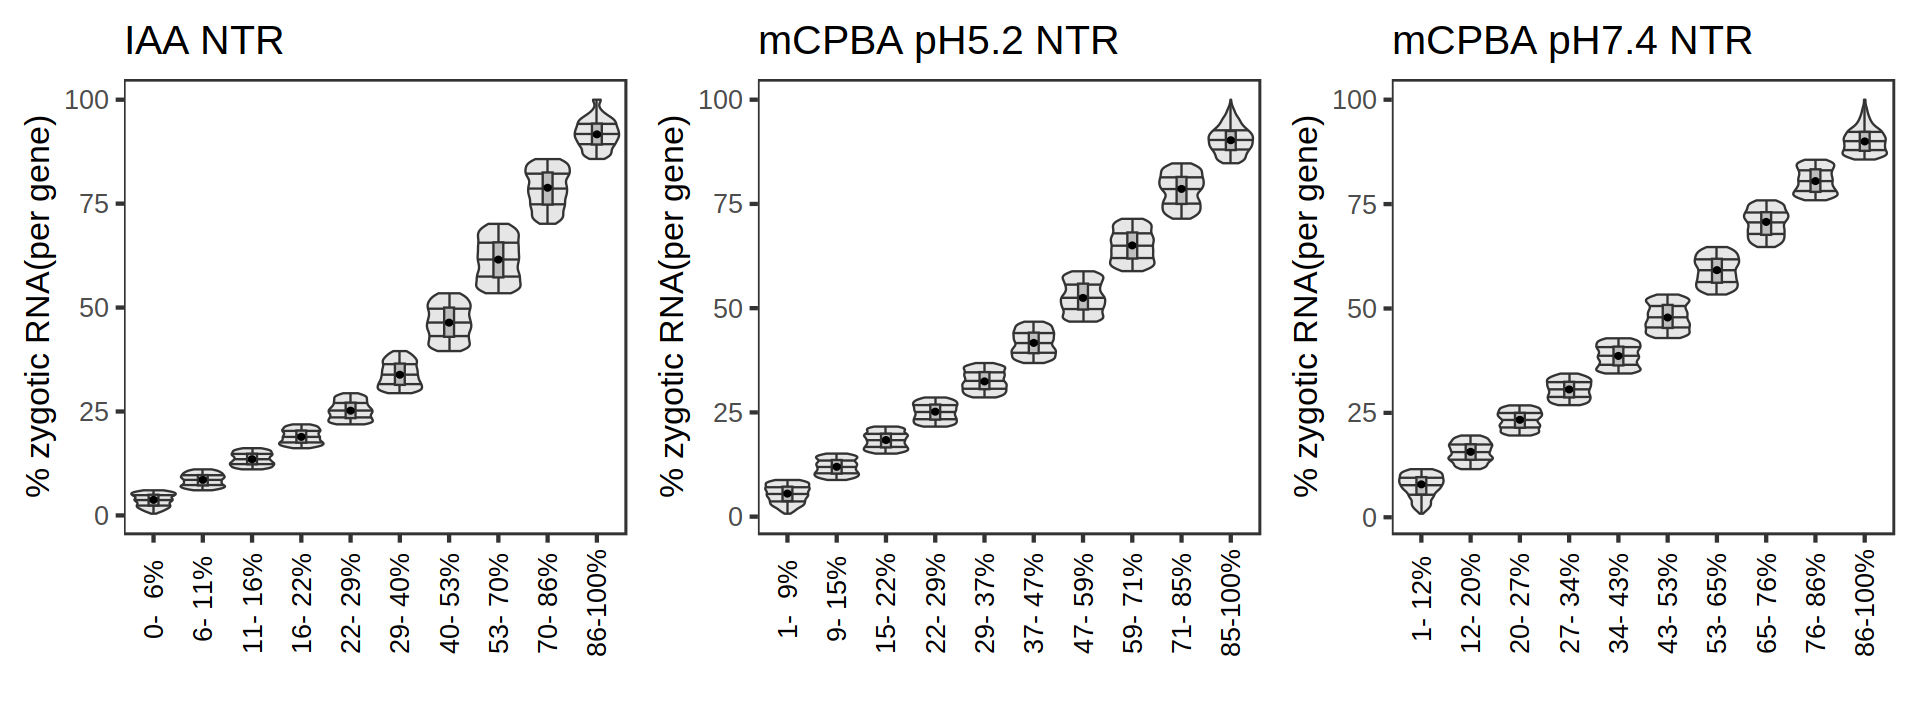

In [ ]:
library(patchwork)

iaa_bin_plot <- iaa_bin_plot + ggtitle("IAA NTR")
m5_bin_plot <- m5_bin_plot + ggtitle("mCPBA pH5.2 NTR")
m7_bin_plot <- m7_bin_plot + ggtitle("mCPBA pH7.4 NTR")
options(repr.plot.height =6, repr.plot.width = 16)

(iaa_bin_plot / m5_bin_plot / m7_bin_plot) +
  plot_layout(ncol = 3)